<a href="https://colab.research.google.com/github/elyorakhmat/ML_journey/blob/main/clustering_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering customers

# Purpose: to cluster customers by thier spendings on differnt shopping areas.
# Tasks:
1. Dataset loading and analyzing.
2. Data processing: data cleaning, data transformation.
3. ML

# Clustering methods:
- K-means
- Hierarchical clustering: dendrogram.
- DBSCAN


# Libraries

In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 1. Dataset loading and analyzing

Dataset link: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/292/wholesale+customers)
## Dataset column description:
  - **channel** (customer type: 1 – HoReCa (Hotel, Restaurant, Cafe) or 2 – Reatail)  
  - **region** (1 – Lisbon, 2 – Oporto, 3 – other)  
  - **fresh** (the money spent on fresh products)  
  - **milk** (the money spent on dairy products)  
  - **grocery** (the money spent on grocery)  
  - **frozen** (the money spent on frozen products)  
  - **Detergents_Paper** (the money spent on chemical cleaning products and paper)  
  - **delicassen** (the money spent on delicatessen)  


In [72]:
df = pd.read_csv("https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Wholesale_customers_data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [74]:
df['Channel'].unique()

array([2, 1])

In [75]:
df['Region'].unique()

array([3, 1, 2])

In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


# Data processing

## Visual analysis

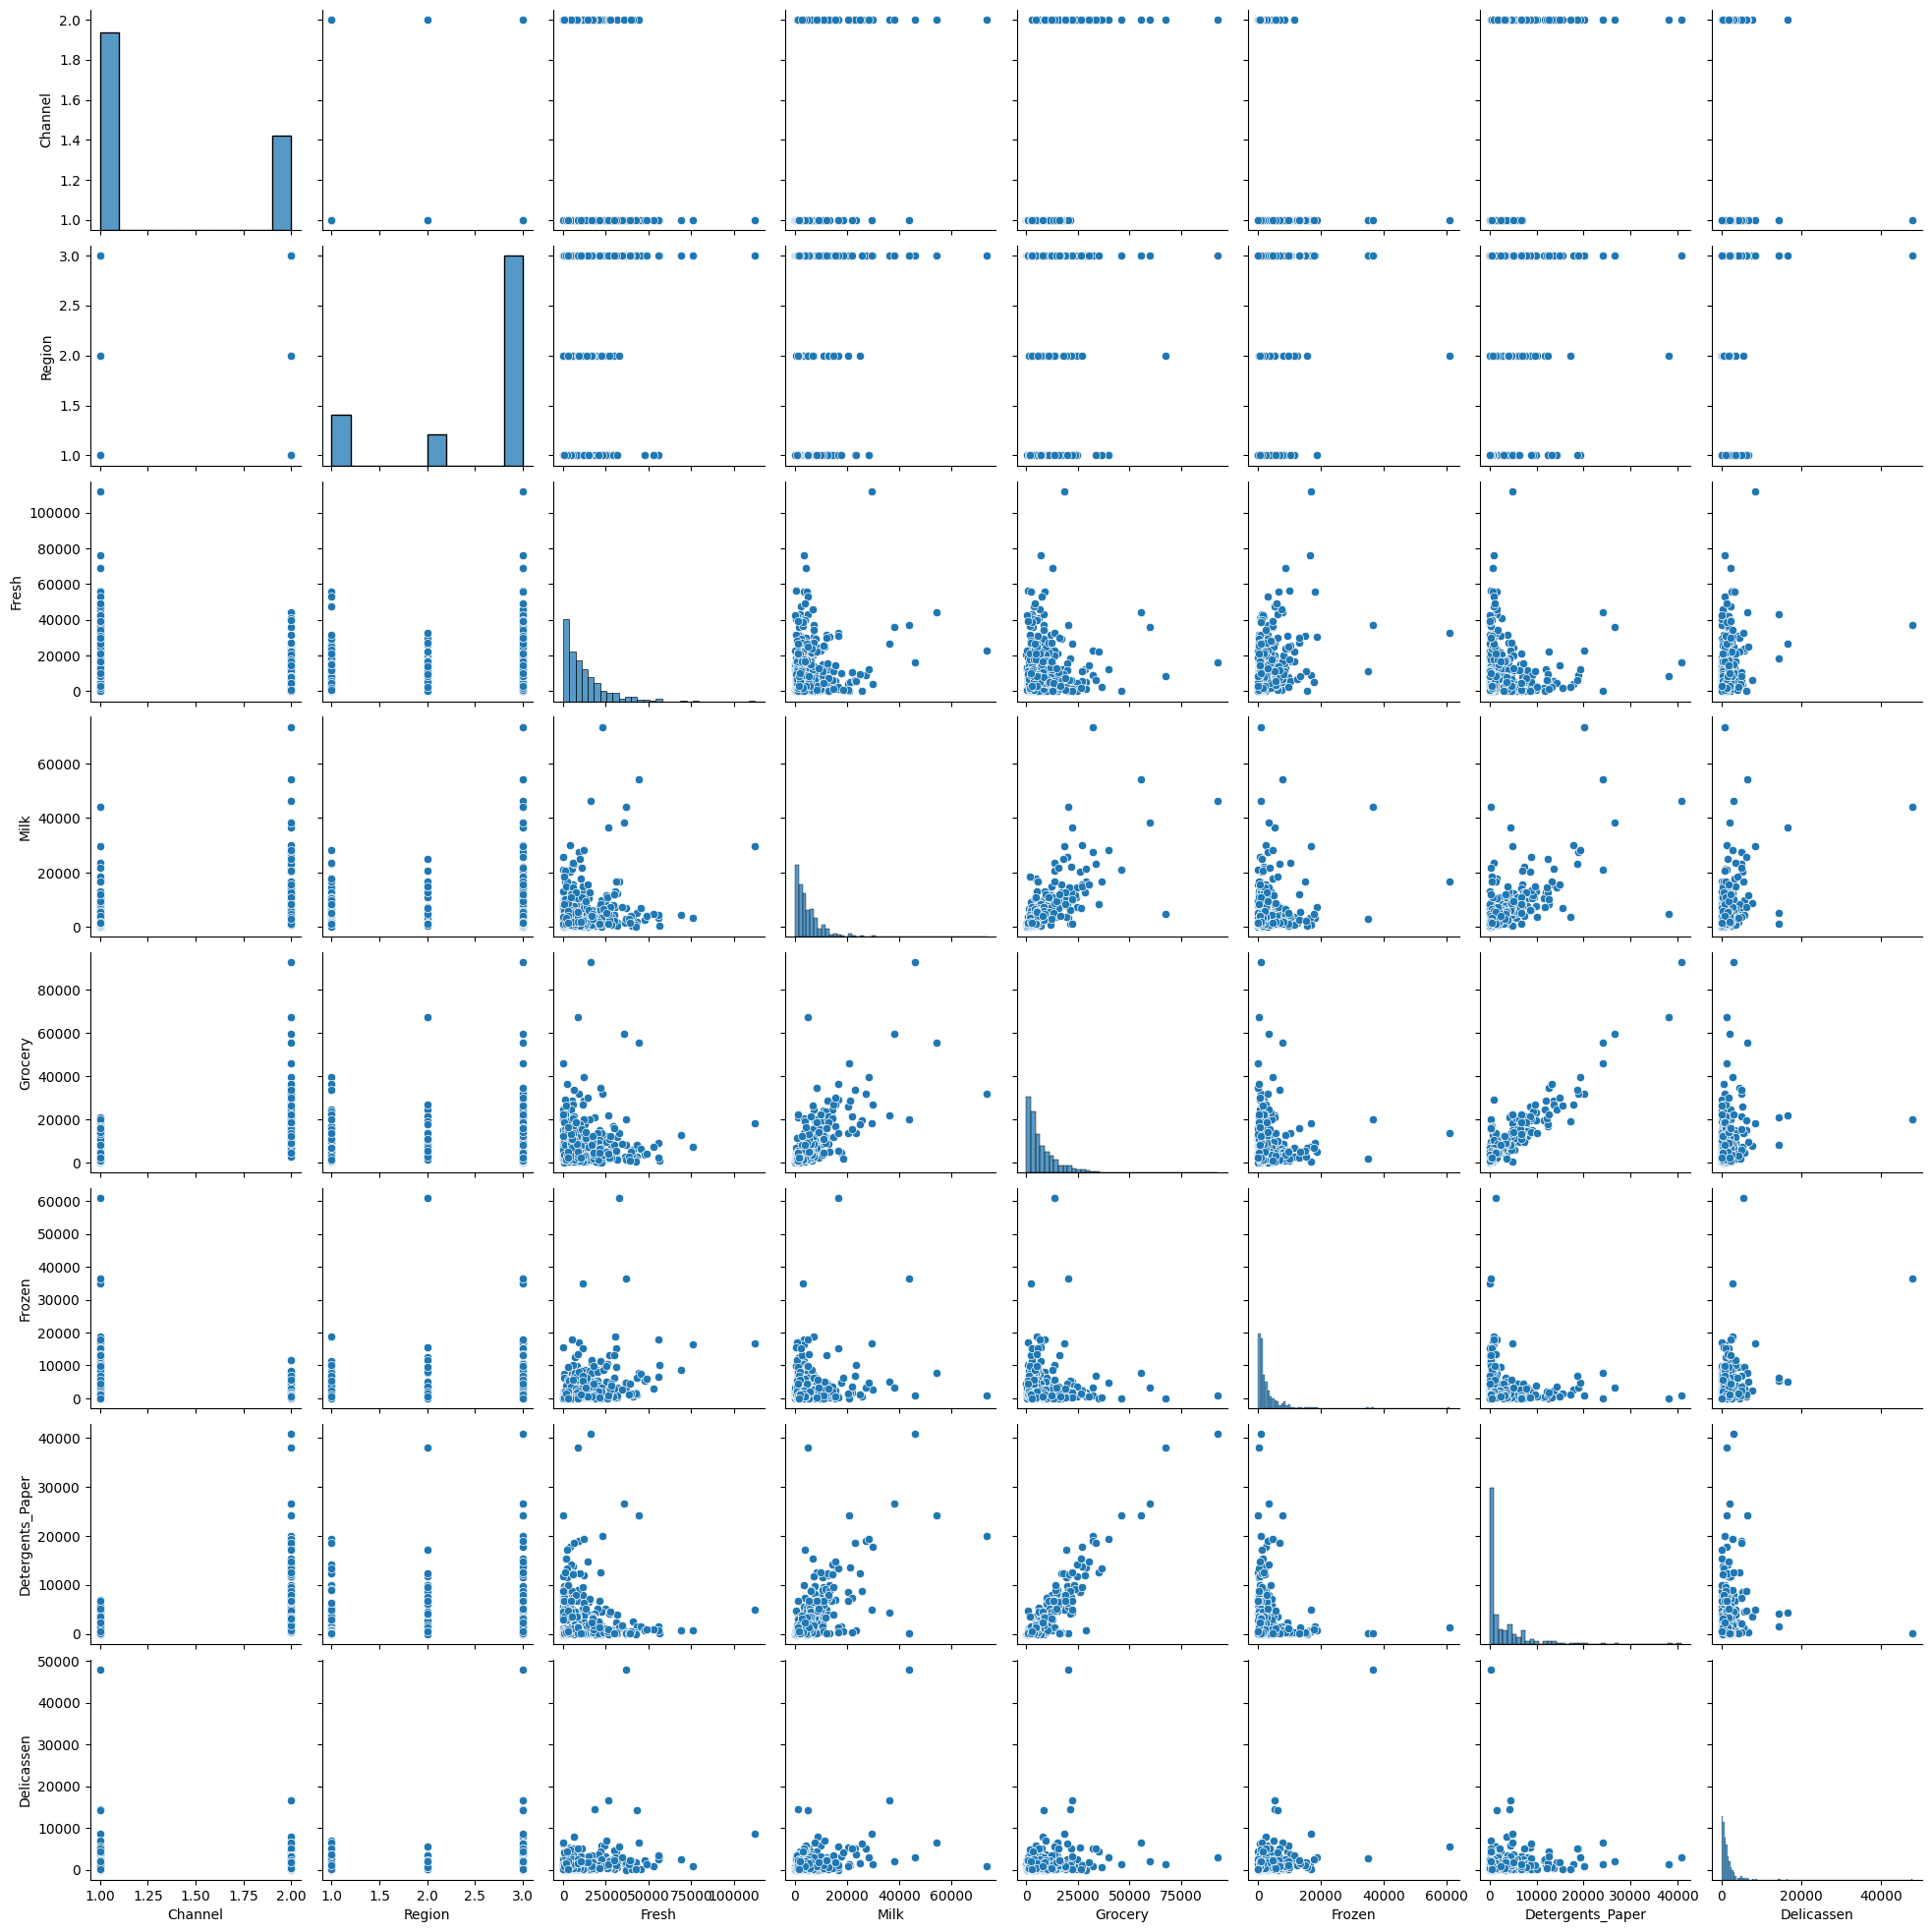

In [8]:
sns.pairplot(df)
plt.show()

### Fresh

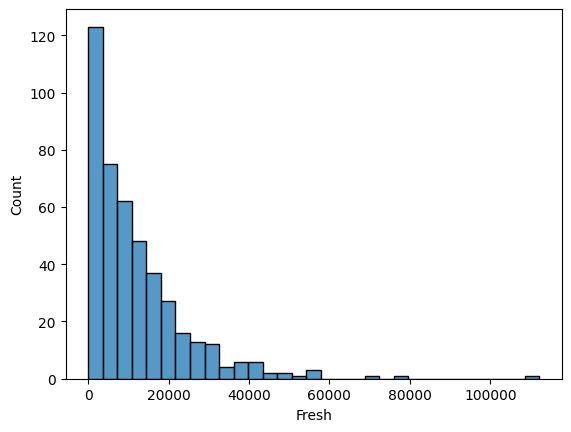

In [9]:
# fresh analysis
sns.histplot(x= df['Fresh'])
plt.show()

In [10]:
df[df['Fresh'] > 60000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
125,1,3,76237,3473,7102,16538,778,918
181,1,3,112151,29627,18148,16745,4948,8550
284,1,3,68951,4411,12609,8692,751,2406


In [78]:
df.drop(index= [125, 181, 284], inplace= True)

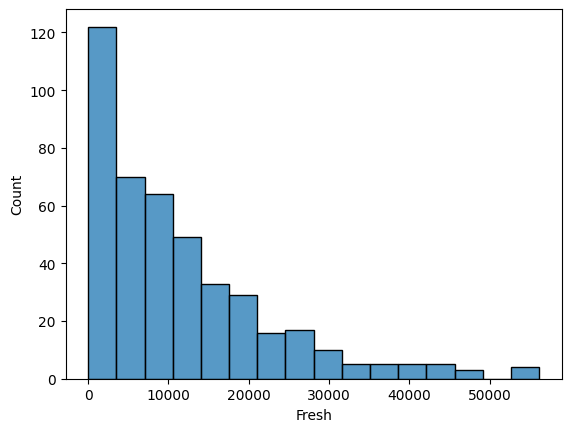

In [13]:
sns.histplot(x= df['Fresh'])
plt.show()

### Milk

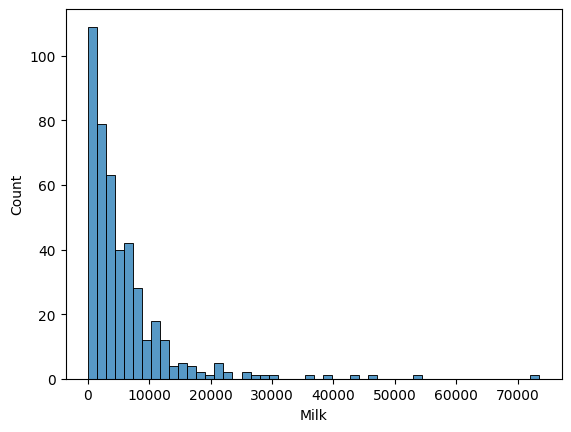

In [14]:
sns.histplot(x= df['Milk'])
plt.show()

In [16]:
df[df['Milk'] > 50_000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
47,2,3,44466,54259,55571,7782,24171,6465
86,2,3,22925,73498,32114,987,20070,903


In [79]:
df.drop(index= [47, 86], inplace= True)

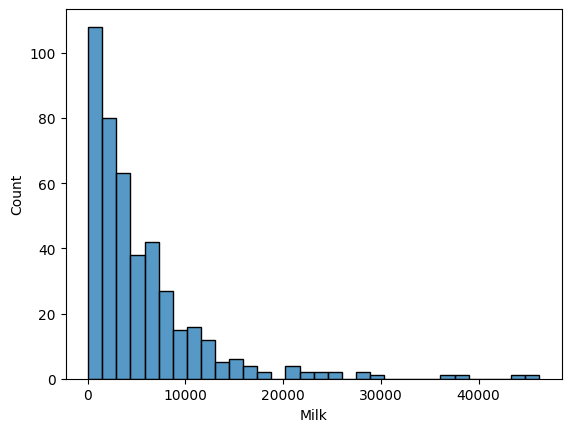

In [18]:
sns.histplot(x= df['Milk'])
plt.show()

### Grocery

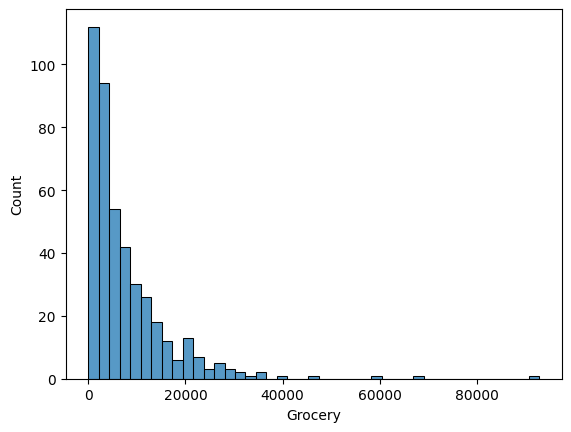

In [19]:
sns.histplot(x= df['Grocery'])
plt.show()

In [22]:
df[df['Grocery'] > 40_000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
61,2,3,35942,38369,59598,3254,26701,2017
65,2,3,85,20959,45828,36,24231,1423
85,2,3,16117,46197,92780,1026,40827,2944
333,2,2,8565,4980,67298,131,38102,1215


In [80]:
df.drop(index= df[df['Grocery'] > 40_000].index, inplace= True)

### Frozen

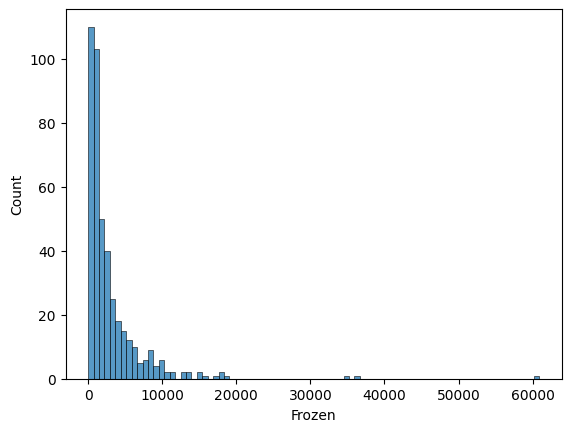

In [25]:
sns.histplot(x= df['Frozen'])
plt.show()

In [43]:
df[df['Frozen'] > 20_000]['Frozen']

,Frozen
93,35009
183,36534
325,60869


In [81]:
df.drop(index= [93, 183, 325], inplace= True)

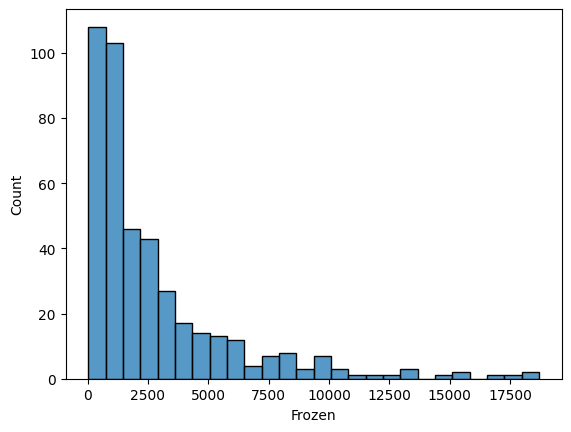

In [83]:
sns.histplot(x= df['Frozen'])
plt.show()

### Detergents_Paper

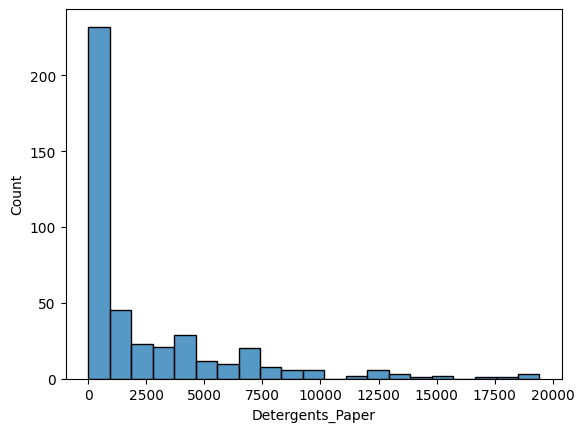

In [48]:
sns.histplot(x= df['Detergents_Paper'])
plt.show()

### Delicassen

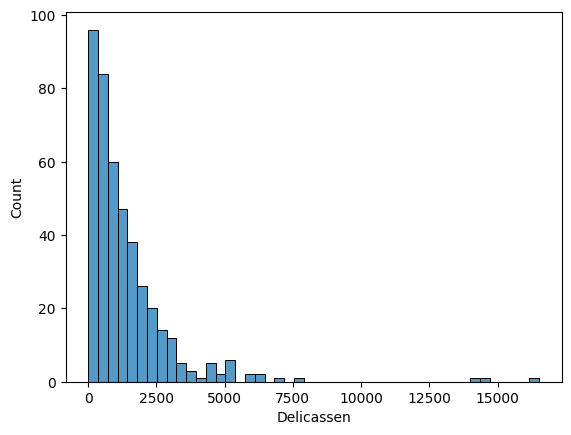

In [86]:
sns.histplot(x= df['Delicassen'])
plt.show()

In [85]:
df[df['Delicassen'] > 10_000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
23,2,3,26373,36423,22019,5154,4337,16523
71,1,3,18291,1266,21042,5373,4173,14472
87,1,3,43265,5025,8117,6312,1579,14351


In [87]:
df.drop(index= [23, 71, 87], inplace= True)

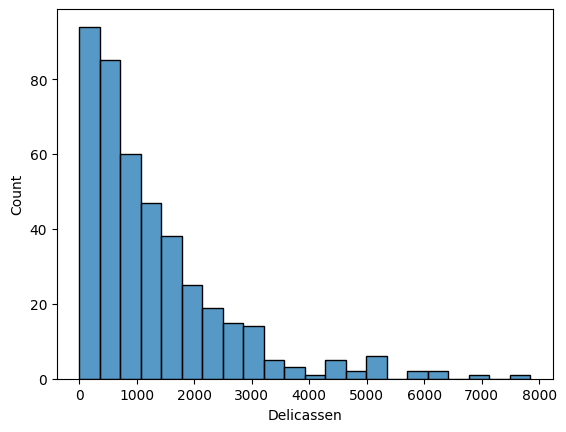

In [88]:
sns.histplot(x= df['Delicassen'])
plt.show()

In [89]:
df.reset_index(drop= True, inplace= True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           425 non-null    int64
 1   Region            425 non-null    int64
 2   Fresh             425 non-null    int64
 3   Milk              425 non-null    int64
 4   Grocery           425 non-null    int64
 5   Frozen            425 non-null    int64
 6   Detergents_Paper  425 non-null    int64
 7   Delicassen        425 non-null    int64
dtypes: int64(8)
memory usage: 26.7 KB


## Scaling

In [61]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214.0,2674,1338
1,2,3,7057,9810,9568,1762.0,3293,1776
2,2,3,6353,8808,7684,2405.0,3516,7844
3,1,3,13265,1196,4221,6404.0,507,1788
4,2,3,22615,5410,7198,3915.0,1777,5185


In [91]:
# features
X = df.values
X[:5, :]

array([[    2,     3, 12669,  9656,  7561,   214,  2674,  1338],
       [    2,     3,  7057,  9810,  9568,  1762,  3293,  1776],
       [    2,     3,  6353,  8808,  7684,  2405,  3516,  7844],
       [    1,     3, 13265,  1196,  4221,  6404,   507,  1788],
       [    2,     3, 22615,  5410,  7198,  3915,  1777,  5185]])

In [92]:
X_ready = StandardScaler().fit_transform(X)
X_ready[:5, :]

array([[ 1.46565622,  0.59885453,  0.14532337,  0.90634809,  0.06464712,
        -0.77787009,  0.04001852,  0.0494492 ],
       [ 1.46565622,  0.59885453, -0.38108871,  0.93699273,  0.35043739,
        -0.29336656,  0.21305195,  0.40153641],
       [ 1.46565622,  0.59885453, -0.44712472,  0.73760358,  0.08216192,
        -0.09211606,  0.2753887 ,  5.27931088],
       [-0.68228824,  0.59885453,  0.20122886, -0.77711714, -0.41095801,
         1.15951806, -0.56573823,  0.41118264],
       [ 1.46565622,  0.59885453,  1.07826965,  0.06143162,  0.0129571 ,
         0.38049397, -0.2107262 ,  3.14186818]])

# ML

## K-means

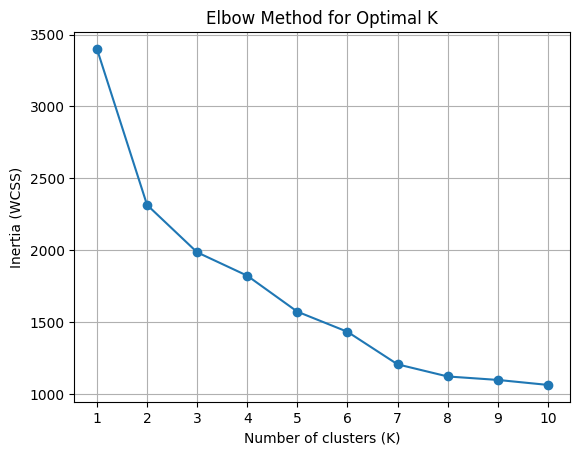

In [94]:
# finding the optimal k using Elbow method
inertias = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_ready)
    inertias.append(model.inertia_)

# Plot
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [95]:
# k = 2

In [96]:
kmeans_model = KMeans(n_clusters= 2, random_state= 42)

kmeans_model.fit(X_ready)

KMeans(n_clusters=2, random_state=42)

In [98]:
# labels
labels1 = kmeans_model.labels_
labels1

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,

In [124]:
# adding the labels
df['Cluster_1'] = labels1
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_1
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


In [100]:
# grouping
df.groupby('Labels_1').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels_1,,,,,,,,
0,1.030717,2.498294,12790.255973,2972.815700,3558.784983,3244.197952,704.918089,1102.334471
1,1.954545,2.606061,7411.666667,9825.840909,14982.984848,1489.833333,6583.833333,1663.045455


## Clustering using scipy dendrogram

In [101]:
# clustering
Z = linkage(X_ready, method= 'ward')

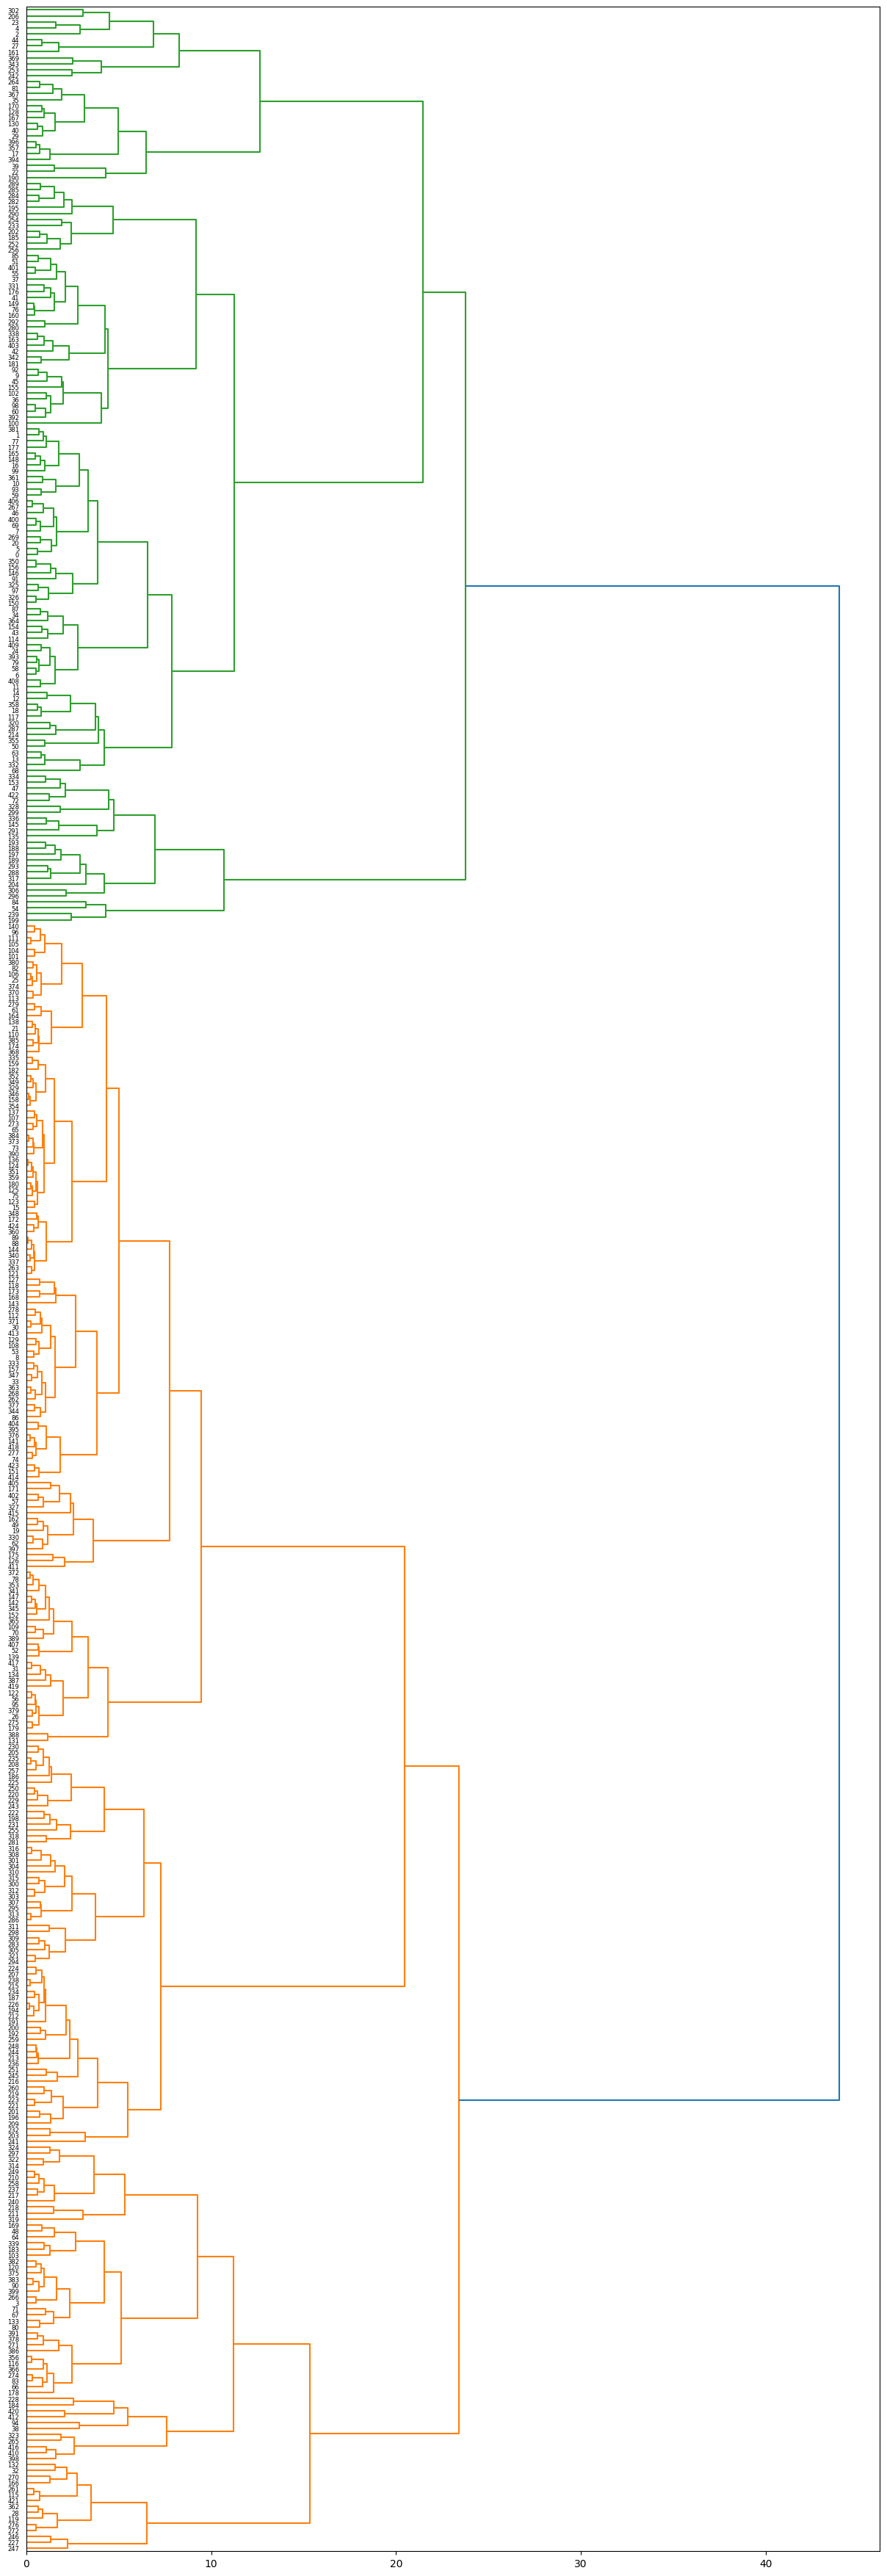

In [118]:
# plotting dendrogram
plt.figure(figsize= (15, 45))
dendrogram(Z, orientation= 'right', leaf_font_size= 6)
plt.show()

In [121]:
# clustering using fcluster
k = 2
clusters = fcluster(Z, k, criterion= 'maxclust')
clusters

array([2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1,

In [126]:
# adding the labels
df['Cluster_2'] = clusters
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_1,Cluster_2
0,2,3,12669,9656,7561,214,2674,1338,1,2
1,2,3,7057,9810,9568,1762,3293,1776,1,2
2,2,3,6353,8808,7684,2405,3516,7844,1,2
3,1,3,13265,1196,4221,6404,507,1788,0,1
4,2,3,22615,5410,7198,3915,1777,5185,1,2


In [127]:
# grouping
df.groupby('Cluster_2').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_1
Cluster_2,,,,,,,,,
1,1.011029,2.470588,12155.591912,2815.566176,3508.356618,3243.628676,745.481618,918.132353,0.014706
2,1.862745,2.640523,9278.196078,9164.784314,13504.607843,1731.640523,5704.810458,1913.555556,0.836601


## hierarchical clustering using sklearn AgglomeraativeClustering

In [128]:
aggl_model = AgglomerativeClustering(n_clusters= 2)

aggl_model.fit(X_ready)

AgglomerativeClustering()

In [131]:
labels3 = aggl_model.labels_
labels3

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [132]:
# adding the cluster labels
df['Cluster_3'] = labels3
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_1,Cluster_2,Cluster_3
0,2,3,12669,9656,7561,214,2674,1338,1,2,0
1,2,3,7057,9810,9568,1762,3293,1776,1,2,0
2,2,3,6353,8808,7684,2405,3516,7844,1,2,0
3,1,3,13265,1196,4221,6404,507,1788,0,1,1
4,2,3,22615,5410,7198,3915,1777,5185,1,2,0


In [133]:
# grouping
df.groupby('Cluster_3').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_1,Cluster_2
Cluster_3,,,,,,,,,,
0,1.862745,2.640523,9278.196078,9164.784314,13504.607843,1731.640523,5704.810458,1913.555556,0.836601,2.0
1,1.011029,2.470588,12155.591912,2815.566176,3508.356618,3243.628676,745.481618,918.132353,0.014706,1.0


## DBSCAN

In [136]:
X_ready[:5, :]

array([[ 1.46565622,  0.59885453,  0.14532337,  0.90634809,  0.06464712,
        -0.77787009,  0.04001852,  0.0494492 ],
       [ 1.46565622,  0.59885453, -0.38108871,  0.93699273,  0.35043739,
        -0.29336656,  0.21305195,  0.40153641],
       [ 1.46565622,  0.59885453, -0.44712472,  0.73760358,  0.08216192,
        -0.09211606,  0.2753887 ,  5.27931088],
       [-0.68228824,  0.59885453,  0.20122886, -0.77711714, -0.41095801,
         1.15951806, -0.56573823,  0.41118264],
       [ 1.46565622,  0.59885453,  1.07826965,  0.06143162,  0.0129571 ,
         0.38049397, -0.2107262 ,  3.14186818]])

In [152]:
dbscan_model = DBSCAN(eps= 1.4, min_samples= 5)

dbscan_model.fit(X_ready)

DBSCAN(eps=1.4)

In [155]:
labels4 = dbscan_model.labels_
labels4

array([ 0,  0, -1,  1, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  0, -1, -1,  1,  0,  0,  0, -1,  0,  0, -1,  1,  1, -1,
        0,  1,  1, -1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,
       -1,  0,  1,  1, -1,  1,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1, -1,
        0,  1,  0,  1,  1,  1,  0,  0,  0, -1,  1,  1,  0,  0,  0, -1,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  1,
       -1,  0,  0,  0,  1,  1,  1,  0, -1,  1,  0,  1,  0, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  0,  0,  1,  1,  1,  0,  1,  1, -1,  0,  1,
        1, -1, -1, -1,  1,  1, -1,  1,  0,  1, -1,  1, -1,  1,  1,  0,  1,
       -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1

In [156]:
# adding labels
df['Cluster_4'] = labels4
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_1,Cluster_2,Cluster_3,Cluster_4
0,2,3,12669,9656,7561,214,2674,1338,1,2,0,0
1,2,3,7057,9810,9568,1762,3293,1776,1,2,0,0
2,2,3,6353,8808,7684,2405,3516,7844,1,2,0,-1
3,1,3,13265,1196,4221,6404,507,1788,0,1,1,1
4,2,3,22615,5410,7198,3915,1777,5185,1,2,0,-1


In [158]:
df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_1,Cluster_2,Cluster_3,Cluster_4
0,2,3,12669,9656,7561,214,2674,1338,1,2,0,0
1,2,3,7057,9810,9568,1762,3293,1776,1,2,0,0
2,2,3,6353,8808,7684,2405,3516,7844,1,2,0,-1
3,1,3,13265,1196,4221,6404,507,1788,0,1,1,1
4,2,3,22615,5410,7198,3915,1777,5185,1,2,0,-1
5,2,3,9413,8259,5126,666,1795,1451,1,2,0,0
6,2,3,12126,3199,6975,480,3140,545,1,2,0,0
7,2,3,7579,4956,9426,1669,3321,2566,1,2,0,0
8,1,3,5963,3648,6192,425,1716,750,0,1,1,1
9,2,3,6006,11093,18881,1159,7425,2098,1,2,0,0


In [157]:
# grouping
df.groupby('Cluster_4').mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_1,Cluster_2,Cluster_3
Cluster_4,,,,,,,,,,,
-1,1.591549,2.197183,14990.183099,10959.957746,14777.816901,5106.718310,5618.366197,2393.605634,0.549296,1.647887,0.352113
0,2.000000,2.817204,7940.172043,7490.935484,11893.903226,1249.935484,5182.290323,1247.462366,0.967742,2.000000,0.000000
1,1.000000,2.521073,11199.793103,2656.061303,3314.636015,2560.869732,746.168582,982.934866,0.011494,1.053640,0.946360


# Conclusion

In [160]:
# In conclusion, I have separated particular set of customers by their shopping
# data in two clusters (groups). Overall, the all models performed well with
# relatively similar results. Each model comes with pros and cons; for example,
# while in kmeans, the number of clusters - k - should be chosen specifically,
# in DBSCAN, the maximum distance between elements in a cluster - eps - plays a
# crucial role.

# By doing the little clustering project, I have solidified my knowledge of
# unsupervised learning further. Particularly, I have improved my analytical
# skills by comparing different models performance on the task.

# Thank you!

In [161]:
# Elyorbek Akhmatov
# 15th August, 2025